### <span style = 'color : Navy' >Problem Statement

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### <span style = 'color : SteelBlue' > Importing the required packages

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D, MaxPool2D
import warnings
warnings.filterwarnings('ignore')
from glob import glob
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/drive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/My Drive/Train")
data_dir_test = pathlib.Path("/content/gdrive/My Drive/Test")

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### <span style = 'color : SaddleBrown' >Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### <span style = 'color : SaddleBrown' >Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
  )

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
  )

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### <span style = 'color : SaddleBrown' >Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

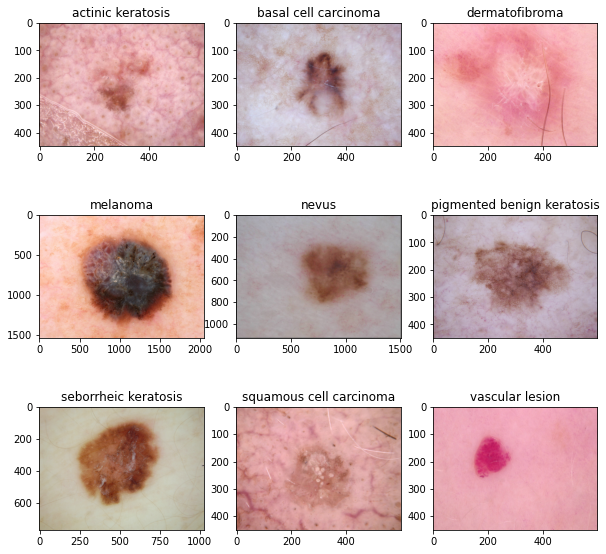

In [ ]:
import matplotlib.pyplot as plt
### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10,10))
for i in range(len(class_names)): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### <span style = 'color : SaddleBrown' >Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
first_model  = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    #first conv 2d layer
                    Conv2D(32, kernel_size=(3, 3),padding = 'Same',activation= 'relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(len(class_names))
])

### <span style = 'color : SaddleBrown' >Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
first_model.compile(
    optimizer ='adam', 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [ ]:
# View the summary of all layers
first_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                    

### <span style = 'color : SaddleBrown' >Train the model

In [ ]:
history = first_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
56/56 [==============================] - 348s 1s/step - loss: 2.1257 - accuracy: 0.1786 - val_loss: 2.0826 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 2s 40ms/step - loss: 2.0248 - accuracy: 0.2165 - val_loss: 2.0429 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 2s 40ms/step - loss: 2.0140 - accuracy: 0.2355 - val_loss: 2.0327 - val_accuracy: 0.3065
Epoch 4/20
56/56 [==============================] - 2s 40ms/step - loss: 1.9025 - accuracy: 0.3030 - val_loss: 1.9563 - val_accuracy: 0.2595
Epoch 5/20
56/56 [==============================] - 2s 40ms/step - loss: 1.7249 - accuracy: 0.3510 - val_loss: 1.7317 - val_accuracy: 0.3893
Epoch 6/20
56/56 [==============================] - 2s 40ms/step - loss: 1.5146 - accuracy: 0.4537 - val_loss: 1.5352 - val_accuracy: 0.4631
Epoch 7/20
56/56 [==============================] - 2s 40ms/step - loss: 1.4721 - accuracy: 0.4542 - val_loss: 1.4692 - val_accuracy: 0.4877
Epoch 8/20
56

In [ ]:
loss, accuracy = first_model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = first_model.evaluate(val_ds, verbose=1)

print("Train Accuracy     : ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print()
print("Train Loss      : ",loss)
print("Validation Loss : ", loss_v)

14/14 [==============================] - 0s 16ms/step - loss: 1.3071 - accuracy: 0.5593
Train Accuracy     :  0.7248883843421936
Validation Accuracy:  0.5592840909957886

Train Loss      :  0.8044553399085999
Validation Loss :  1.3070746660232544


### <span style = 'color : SaddleBrown' >Visualizing training results

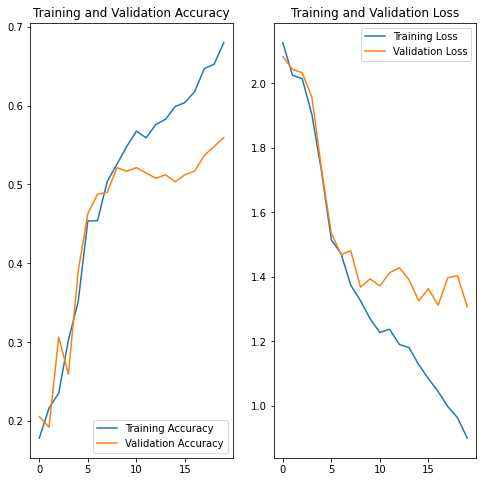

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here
#### <span style = 'color : ForestGreen' >The training accuracy shows an increasing pattern with the maximum value of 72%  whereas the validation accuracy has a maximum value of 56%. The difference between training accuracy and validation accuracy is 16%. The Training Loss and Validation Loss also follows a pattern inversely similar to the corresponding accuracies. As the training accuarcy and validation accuracy shows a notable difference in values, it could be infered that the created model may have been overfitted.

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
augumented_data = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

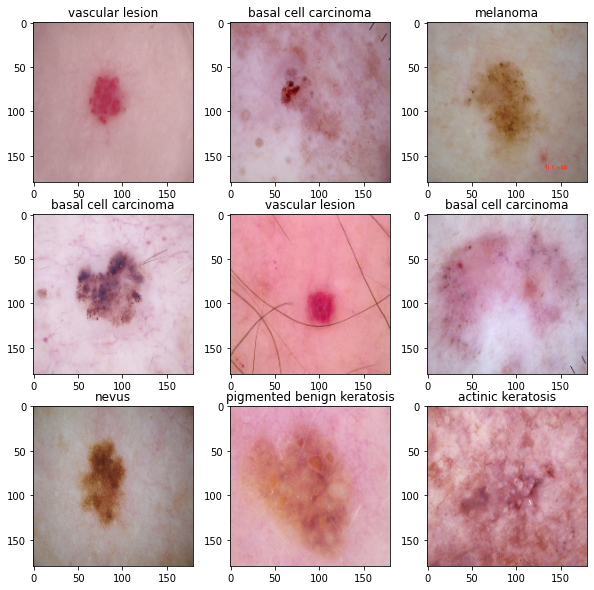

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, labels in  train_ds.take(1):
  for i in range(len(class_names)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augumented_data(images)[i].numpy().astype("uint8"))
    ax.set_title(class_names[labels[i]])
plt.show()

### Todo:
### <span style = 'color : SaddleBrown' >Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
aug_data_model = Sequential([augumented_data,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    #first conv 2d layer
                    Conv2D(32, kernel_size=(3, 3),padding = 'Same',activation= 'relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(len(class_names))
])


### <span style = 'color : SaddleBrown' >Compiling the model

In [ ]:
## Your code goes here
aug_data_model.summary()
aug_data_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 90, 90, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 64)        18496     
                                                      

### <span style = 'color : SaddleBrown' >Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
aug_data_model_history = aug_data_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
56/56 [==============================] - 4s 47ms/step - loss: 2.1836 - accuracy: 0.1780 - val_loss: 2.1295 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 3s 45ms/step - loss: 2.0309 - accuracy: 0.1925 - val_loss: 2.0842 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 2s 44ms/step - loss: 2.0303 - accuracy: 0.1897 - val_loss: 2.0760 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 2s 44ms/step - loss: 2.0314 - accuracy: 0.2009 - val_loss: 2.0388 - val_accuracy: 0.1924
Epoch 5/20
56/56 [==============================] - 2s 44ms/step - loss: 2.0210 - accuracy: 0.2059 - val_loss: 2.0175 - val_accuracy: 0.2752
Epoch 6/20
56/56 [==============================] - 3s 45ms/step - loss: 1.9441 - accuracy: 0.2790 - val_loss: 1.8757 - val_accuracy: 0.3199
Epoch 7/20
56/56 [==============================] - 2s 44ms/step - loss: 1.8278 - accuracy: 0.3175 - val_loss: 1.7441 - val_accuracy: 0.3624
Epoch 8/20
56

In [ ]:
loss, accuracy = aug_data_model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = aug_data_model.evaluate(val_ds, verbose=1)
print("Model using augumented data")
print("Train Accuracy     : ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print()
print("Train Loss      : ",loss)
print("Validation Loss : ", loss_v)

14/14 [==============================] - 0s 16ms/step - loss: 1.3400 - accuracy: 0.5190
Model using augumented data
Train Accuracy     :  0.5530133843421936
Validation Accuracy:  0.5190156698226929

Train Loss      :  1.2572036981582642
Validation Loss :  1.3400471210479736


### <span style = 'color : SaddleBrown' >Visualizing the results

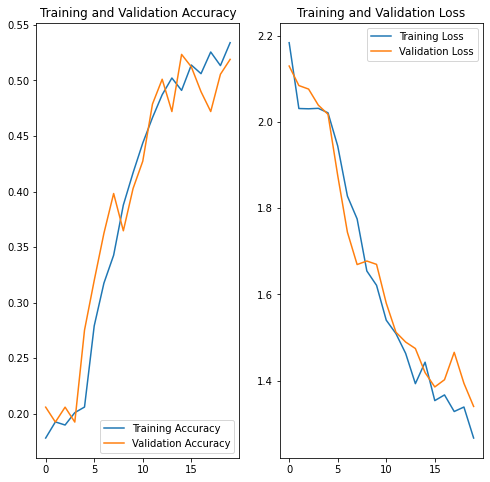

In [ ]:
epochs = 20
acc = aug_data_model_history.history['accuracy']
val_acc = aug_data_model_history.history['val_accuracy']

loss = aug_data_model_history.history['loss']
val_loss = aug_data_model_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
#### <span style = 'color : ForestGreen' >The maximum training accuracy value is 55% while the validation accuracy is 52%. This hints the reduction of overfitting, but as the overall accuracy value has come down, it may be noted that the model performance is not good.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.
class_df  = []
for i in class_names:
  path = [x for x in data_dir_train.glob(i+'/*.jpg')]
  class_df.append(len(path))
class_df = pd.DataFrame(list(zip(class_names,class_df)),columns=["Type of Cancer","Frequency"])
class_df

,Type of Cancer,Frequency
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


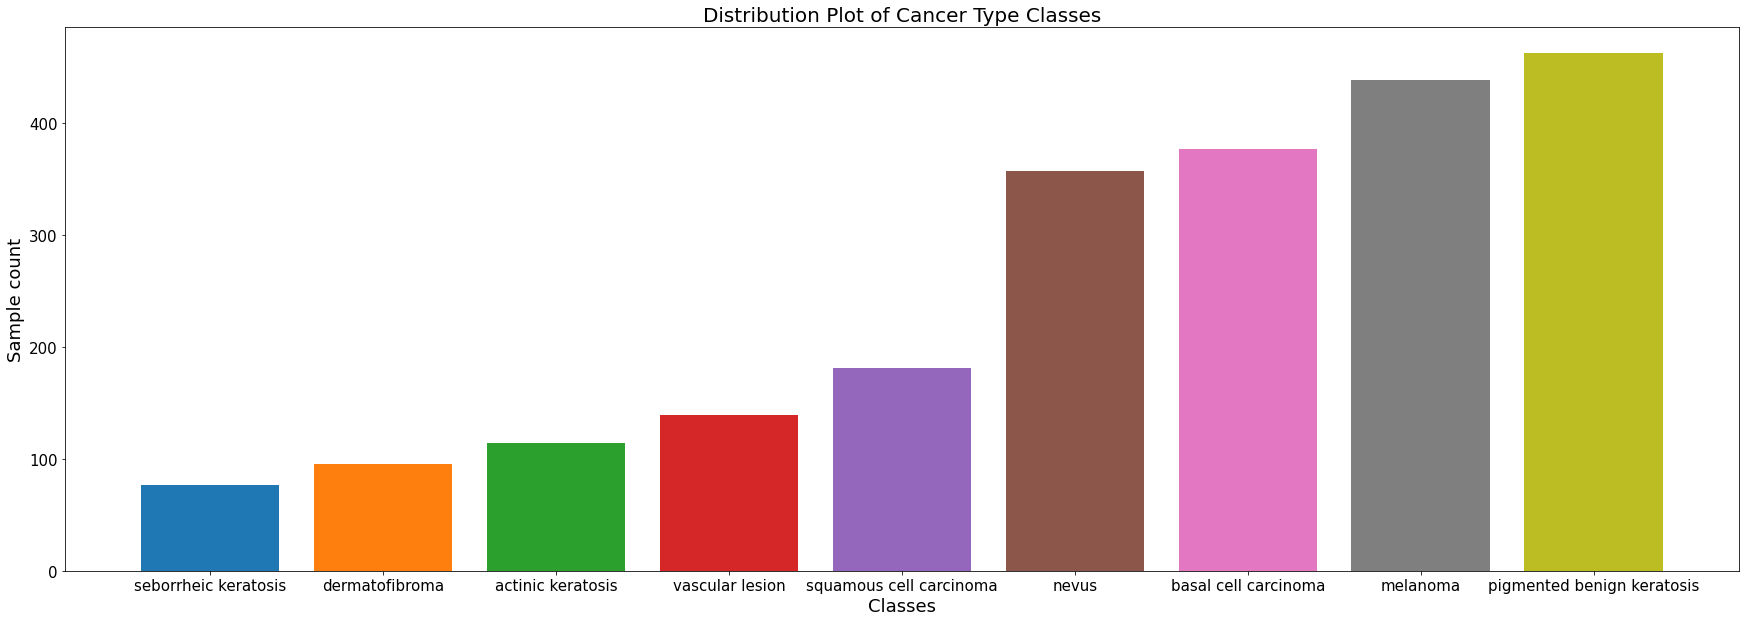

In [ ]:
from numpy.lib.function_base import rot90
plt.figure(figsize=(30,10))
class_df.sort_values(by="Frequency",inplace=True)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.bar(class_df["Type of Cancer"],class_df['Frequency'], color=colors)
plt.yticks(fontsize=15)
plt.xlabel('Classes',fontsize = 18)
plt.ylabel('Sample count',fontsize = 18)
plt.title('Distribution Plot of Cancer Type Classes',fontsize=20)
plt.xticks(fontsize = 15)
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### <span style = 'color : ForestGreen'>'Seborrheic keratosis' class has the least number of samples

#### - Which classes dominate the data in terms proportionate number of samples?
#### <span style = 'color : ForestGreen'>'Pigmented benign keratosis' class has the least number of samples

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="/content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1185C38610>: 100%|██████████| 500/500 [00:21<00:00, 23.54 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F1182BF8950>: 100%|██████████| 500/500 [00:21<00:00, 23.58 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1185FBC610>: 100%|██████████| 500/500 [00:23<00:00, 21.22 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F1182C291D0>: 100%|██████████| 500/500 [01:28<00:00,  5.64 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1185C5BED0>: 100%|██████████| 500/500 [01:37<00:00,  5.15 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1185C1E3D0>: 100%|██████████| 500/500 [00:18<00:00, 27.16 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F12189ECAD0>: 100%|██████████| 500/500 [00:42<00:00, 11.76 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F1182C908D0>: 100%|██████████| 500/500 [00:18<00:00, 26.84 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F119E00CA50>: 100%|██████████| 500/500 [00:19<00:00, 26.07 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### <span style = 'color : SaddleBrown' >Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011077.jpg_03ea02c5-0806-420d-99cc-7100ef8f107e.jpg',
 '/content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011178.jpg_b387fcf1-d28e-4338-9745-6cea470693ed.jpg',
 '/content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011030.jpg_a8962cca-a0fa-496f-bb99-6daaee0ac875.jpg',
 '/content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010872.jpg_e650f595-b213-428c-ac8f-01e502dfdc6f.jpg',
 '/content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_orig

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',


In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [ ]:
df2['Label'].value_counts()

seborrheic keratosis          500
basal cell carcinoma          500
melanoma                      500
pigmented benign keratosis    500
dermatofibroma                500
squamous cell carcinoma       500
nevus                         500
vascular lesion               500
actinic keratosis             500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train="/content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here
class_balanced_model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    #first conv 2d layer
                    Conv2D(32, kernel_size=(3, 3),padding = 'Same',activation= 'relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(len(class_names))
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
class_balanced_model.summary()
class_balanced_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 90, 90, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                  

#### **Todo:**  Train your model

In [ ]:
epochs = 50
## Your code goes here, use 50 epochs.
class_balanced_model_history = class_balanced_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 32s 178ms/step - loss: 2.0221 - accuracy: 0.2066 - val_loss: 1.7979 - val_accuracy: 0.3430
Epoch 2/50
169/169 [==============================] - 32s 183ms/step - loss: 1.5902 - accuracy: 0.3887 - val_loss: 1.5141 - val_accuracy: 0.4439
Epoch 3/50
169/169 [==============================] - 31s 176ms/step - loss: 1.4538 - accuracy: 0.4260 - val_loss: 1.4768 - val_accuracy: 0.4499
Epoch 4/50
169/169 [==============================] - 31s 175ms/step - loss: 1.3673 - accuracy: 0.4800 - val_loss: 1.3151 - val_accuracy: 0.5137
Epoch 5/50
169/169 [==============================] - 30s 175ms/step - loss: 1.2407 - accuracy: 0.5269 - val_loss: 1.3264 - val_accuracy: 0.5204
Epoch 6/50
169/169 [==============================] - 31s 175ms/step - loss: 1.1262 - accuracy: 0.5729 - val_loss: 1.1407 - val_accuracy: 0.5865
Epoch 7/50
169/169 [==============================] - 31s 176ms/step - loss: 1.0048 - accuracy: 0.6198 - val_loss: 1.0384 - val_ac

In [ ]:
loss, accuracy = class_balanced_model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = class_balanced_model.evaluate(val_ds, verbose=1)
print("Model using balanced data for classes")
print("Train Accuracy     : ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print()
print("Train Loss      : ",loss)
print("Validation Loss : ", loss_v)

43/43 [==============================] - 6s 115ms/step - loss: 0.7672 - accuracy: 0.8441
Model using balanced data for classes
Train Accuracy     :  0.9558605551719666
Validation Accuracy:  0.8440979719161987

Train Loss      :  0.10864733159542084
Validation Loss :  0.767153799533844


#### **Todo:**  Visualize the model results

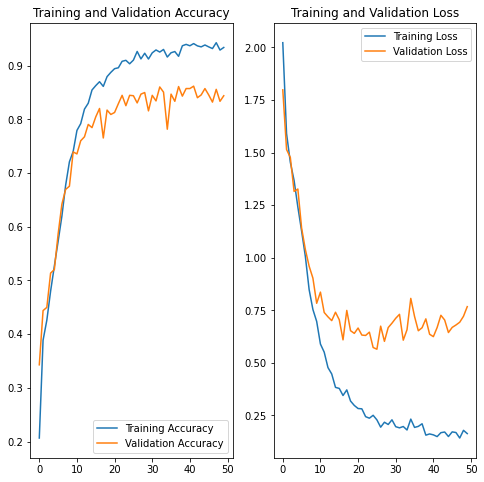

In [ ]:
acc = class_balanced_model_history.history['accuracy']
val_acc = class_balanced_model_history.history['val_accuracy']

loss = class_balanced_model_history.history['loss']
val_loss = class_balanced_model_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?
#### <span style = 'color : ForestGreen' >The maximum training accuracy value is 95% while the validation accuracy is 84%. The values clearly shows that there isn't much of overfitting as well the model performance is decently good. 

### <span style = 'color : SaddleBrown' >Trying to further improve the model by changing the parameters

In [ ]:
final_model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    #first conv 2d layer
                    Conv2D(32, kernel_size=(3, 3),padding = 'Same',activation= 'relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(len(class_names))

])

In [ ]:
final_model.summary()
final_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 45, 45, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 45, 45, 64)       

In [ ]:
epochs = 100
## Your code goes here, use 100 epochs.
final_model_history = final_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
169/169 [==============================] - 31s 176ms/step - loss: 1.7940 - accuracy: 0.3105 - val_loss: 1.4871 - val_accuracy: 0.4491
Epoch 2/100
169/169 [==============================] - 31s 177ms/step - loss: 1.4752 - accuracy: 0.4299 - val_loss: 1.3866 - val_accuracy: 0.4751
Epoch 3/100
169/169 [==============================] - 31s 176ms/step - loss: 1.3328 - accuracy: 0.4894 - val_loss: 1.3552 - val_accuracy: 0.4670
Epoch 4/100
169/169 [==============================] - 32s 183ms/step - loss: 1.1964 - accuracy: 0.5486 - val_loss: 1.1383 - val_accuracy: 0.5724
Epoch 5/100
169/169 [==============================] - 31s 175ms/step - loss: 1.1028 - accuracy: 0.5912 - val_loss: 1.1081 - val_accuracy: 0.5954
Epoch 6/100
169/169 [==============================] - 30s 175ms/step - loss: 0.9289 - accuracy: 0.6582 - val_loss: 1.0268 - val_accuracy: 0.6318
Epoch 7/100
169/169 [==============================] - 31s 176ms/step - loss: 0.8377 - accuracy: 0.6983 - val_loss: 0.9149 -

In [ ]:
loss, accuracy = final_model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = final_model.evaluate(val_ds, verbose=1)
print("Train Accuracy     : ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print()
print("Train Loss      : ",loss)
print("Validation Loss : ", loss_v)

43/43 [==============================] - 6s 111ms/step - loss: 1.0684 - accuracy: 0.8396
Train Accuracy     :  0.9638352990150452
Validation Accuracy:  0.839643657207489

Train Loss      :  0.07972773164510727
Validation Loss :  1.0683754682540894


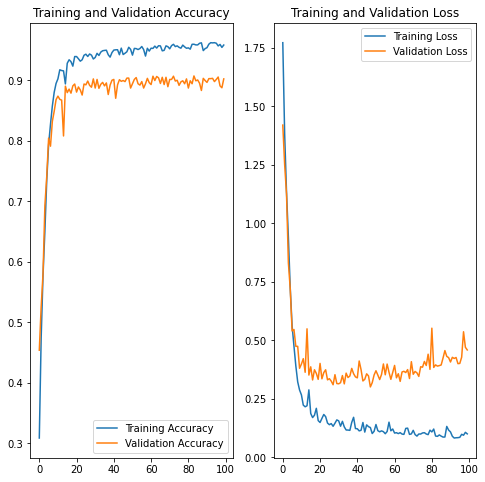

In [ ]:
acc = final_model_history.history['accuracy']
val_acc = final_model_history.history['val_accuracy']

loss = final_model_history.history['loss']
val_loss = final_model_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### <span style = 'color : ForestGreen' >The maximum training accuracy value is 96% while the validation accuracy still remains at 84%. But still, the values clearly shows that there isn't much of overfitting as well the model performance is decently good. 

### <span style = 'color : SaddleBrown' >Prediction using the model on test data

Actual Class    : basal cell carcinoma
Predicted Class : basal cell carcinoma
Model correctly predicted the class


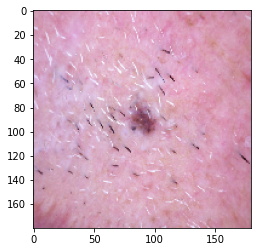

In [ ]:
from glob import glob
i = np.random.randint(len(class_names))
Test_image_path = os.path.join(data_dir_test, class_names[i], '*')
Test_image = glob(Test_image_path)
j = np.random.randint(len(Test_image))
Test_image = load_img(Test_image[j],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = final_model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class    :", class_names[1])
print("Predicted Class :", pred_class)
if (class_names[1] == pred_class):
    print("Model correctly predicted the class")